In [1]:
"""author: GK"""
import pandas as pd
import collections
import numpy as np

In [2]:
""" Import data """

all_features_df = pd.read_csv('All_features_df.csv')
tickers = all_features_df.Name.unique()
all_features_df['date'] = pd.to_datetime(all_features_df['date'],format='%Y-%m-%d')
all_features_df.set_index(['Name','date'],inplace = True) # custom created features
orig_features_df = all_features_df.loc[:,['open','high','low','close','volume']] # O,H,L,C,Volume only

In [3]:
""" Target industries """
weblink = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
industries_df = pd.read_html(weblink)[0]
industries_df.to_csv('wiki_sp500_industries.csv')
print(industries_df.head())

  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

In [4]:
"""for prediction"""
orig_features_df

open   high    low  close    volume
Name date                                            
AAL  2013-02-08  15.07  15.12  14.63  14.75   8407500
     2013-02-11  14.89  15.01  14.26  14.46   8882000
     2013-02-12  14.45  14.51  14.10  14.27   8126000
     2013-02-13  14.30  14.94  14.25  14.66  10259500
     2013-02-14  14.94  14.96  13.16  13.99  31879900
...                ...    ...    ...    ...       ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82   2982259
     2018-02-02  77.53  78.12  76.73  76.78   2595187
     2018-02-05  76.64  76.92  73.18  73.83   2962031
     2018-02-06  72.74  74.56  72.13  73.27   4924323
     2018-02-07  72.70  75.00  72.69  73.86   4534912

[619040 rows x 5 columns]

In [5]:
all_features_df

open   high    low  close    volume  bollinger_bandwidth  \
Name date                                                                    
AAL  2013-02-08  15.07  15.12  14.63  14.75   8407500                  NaN   
     2013-02-11  14.89  15.01  14.26  14.46   8882000                  NaN   
     2013-02-12  14.45  14.51  14.10  14.27   8126000                  NaN   
     2013-02-13  14.30  14.94  14.25  14.66  10259500                  NaN   
     2013-02-14  14.94  14.96  13.16  13.99  31879900                  NaN   
...                ...    ...    ...    ...       ...                  ...   
ZTS  2018-02-01  76.84  78.27  76.69  77.82   2982259             0.109589   
     2018-02-02  77.53  78.12  76.73  76.78   2595187             0.098872   
     2018-02-05  76.64  76.92  73.18  73.83   2962031             0.093314   
     2018-02-06  72.74  74.56  72.13  73.27   4924323             0.096212   
     2018-02-07  72.70  75.00  72.69  73.86   4534912             0.100041   

                 coppock_curve     macd  market_fac_ind  momentum_indic  ...  \
Name date                                                                ...   
AAL  2013-02-08            NaN  0.00000    5.828130e-08             NaN  ...   
     2013-02-11            NaN -0.00289    8.444044e-08             NaN  ...   
     2013-02-12            NaN -0.00624    5.045533e-08             NaN  ...   
     2013-02-13            NaN  0.00311    6.725474e-08             NaN  ...   
     2013-02-14            NaN -0.01232    5.646191e-08             NaN  ...   
...                        ...      ...             ...             ...  ...   
ZTS  2018-02-01         10.532 -0.06399    5.297997e-07            3.23  ...   
     2018-02-02          8.811 -0.18890    5.356069e-07            1.39  ...   
     2018-02-05          5.751 -0.45968    1.262647e-06           -1.71  ...   
     2018-02-06          2.316 -0.65412    4.934688e-07           -3.50  ...   
     2018-02-07         -0.331 -0.71565    5.093814e-07           -2.47  ...   

                 typical_price  Accum_Distri  Will_R_Form  Weighted_Close  \
Name date                                                                   
AAL  2013-02-08      14.833333           NaN          NaN         14.8125   
     2013-02-11      14.576667           NaN          NaN         14.5475   
     2013-02-12      14.293333           NaN          NaN         14.2875   
     2013-02-13      14.616667           NaN          NaN         14.6275   
     2013-02-14      14.036667           NaN          NaN         14.0250   
...                        ...           ...          ...             ...   
ZTS  2018-02-01      77.593333  8.040917e+09   -43.097015         77.6500   
     2018-02-02      77.210000  8.025405e+09   -68.089431         77.1025   
     2018-02-05      74.643333  7.990253e+09   -90.647482         74.4400   
     2018-02-06      73.320000  7.957796e+09   -85.750000         73.3075   
     2018-02-07      73.850000  7.930930e+09   -78.375000         73.8525   

                     GAPO    On_Bal_Vol        RSI  Donchian_Width  \
Name date                                                            
AAL  2013-02-08       NaN           NaN        NaN             NaN   
     2013-02-11       NaN           NaN        NaN             NaN   
     2013-02-12       NaN           NaN        NaN             NaN   
     2013-02-13       NaN           NaN        NaN             NaN   
     2013-02-14       NaN           NaN        NaN             NaN   
...                   ...           ...        ...             ...   
ZTS  2018-02-01  0.636198  2.126335e+09  64.912281            5.36   
     2018-02-02  0.603742  2.083458e+09  56.278229            4.92   
     2018-02-05  0.734634  2.040218e+09  43.835616            6.95   
     2018-02-06  0.787949  1.994824e+09  36.742424            8.00   
     2018-02-07  0.787949  2.042164e+09  40.749064            8.00   

                 True_Range  Aaron_Osc  
Name dat

# RNN

**Goal**: use about 80% of past years' data to predict 20% of future years' data. <br>  <br>
Split roughly<br>
Train: 4 years (Feb 2013 to Feb 2017)<br>
Test: 1 year (Feb 2017 to Feb 2018)<br>

Alternative approaches: 
1. XGboost with technical indicators (https://medium.com/@hsahu/stock-prediction-with-xgboost-a-technical-indicators-approach-5f7e5940e9e3)
2. Multinomial regression
3. ARIMA

In [6]:
orig_features_df.loc['AAPL'].index

DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

In [7]:
# https://www.tensorflow.org/guide/keras/rnn

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,accuracy_score
np.random.seed(42)

In [8]:
# trial for AAPL data
dataset = orig_features_df.loc['AAPL'].close.to_numpy()
# normalize the dataset - LSTMS are scale dependent
scaler = MinMaxScaler(feature_range=(0, 1),copy = True)
dataset = scaler.fit_transform(dataset.reshape(-1,1))

In [9]:
# lookback for LSTM
lstm_period = 21

def look_back(data,period = 7):
    X,y = [],[]
    for i in range(len(data)-period):
        X.append(data[i:i+period,0])
        y.append(data[i+period,0])
    return np.array(X),np.array(y)

X,y = look_back(dataset,lstm_period)       

In [10]:
# Train Test Split: 80 : 20
train_ratio = 0.8
train_size = int(len(X)*train_ratio)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]
print(len(X_train), len(X_test),len(y_train), len(y_test))

990 248 990 248


In [11]:
# simple model: Build-Compile-Fit-Predict approach
simple_rnn = tf.keras.Sequential()
simple_rnn.add(layers.LSTM(256,activation='relu',return_sequences = True, input_shape = (lstm_period,1)))
simple_rnn.add(layers.LSTM(16,activation = 'relu'))
simple_rnn.add(layers.Dense(1))
simple_rnn.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])

# Reshape Data: (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

simple_rnn.fit(X_train,y_train,shuffle = False,epochs = 25,verbose = 2,batch_size = 1)


Train on 990 samples
Epoch 1/25
990/990 - 9s - loss: 4.5460e-04 - accuracy: 0.0010
Epoch 2/25
990/990 - 8s - loss: 0.0011 - accuracy: 0.0010
Epoch 3/25
990/990 - 9s - loss: 9.2383e-04 - accuracy: 0.0010
Epoch 4/25
990/990 - 10s - loss: 8.0940e-04 - accuracy: 0.0010
Epoch 5/25
990/990 - 9s - loss: 7.3275e-04 - accuracy: 0.0010
Epoch 6/25
990/990 - 8s - loss: 6.7815e-04 - accuracy: 0.0010
Epoch 7/25
990/990 - 9s - loss: 6.3664e-04 - accuracy: 0.0010
Epoch 8/25
990/990 - 9s - loss: 6.0111e-04 - accuracy: 0.0010
Epoch 9/25
990/990 - 9s - loss: 5.7003e-04 - accuracy: 0.0010
Epoch 10/25
990/990 - 8s - loss: 5.4278e-04 - accuracy: 0.0010
Epoch 11/25
990/990 - 10s - loss: 5.2097e-04 - accuracy: 0.0010
Epoch 12/25
990/990 - 9s - loss: 4.9991e-04 - accuracy: 0.0010
Epoch 13/25
990/990 - 10s - loss: 4.8321e-04 - accuracy: 0.0010
Epoch 14/25
990/990 - 10s - loss: 4.6728e-04 - accuracy: 0.0010
Epoch 15/25
990/990 - 9s - loss: 4.5494e-04 - accuracy: 0.0010
Epoch 16/25
990/990 - 8s - loss: 4.4374e-04

In [12]:
y_pred_seen = simple_rnn.predict(X_train)
# y_pred_unseen = simple_rnn.predict(X_test) # This is not completely correct as it is peeking into the future

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))
plt.plot(scaler.inverse_transform(y_pred_seen),color = 'b',label = 'Predicted_SEEN')
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),color = 'k',label = 'Actual_SEEN_data')
plt.xlabel('#(day)')
plt.ylabel('Price')
plt.title('Prediction in SEEN AAPL data')
plt.legend()
plt.show()


"""Note the commented block here is looking into future data is taken into consideration while prediciting """
# pred_unseen_to_plot = len(y_train)
# plt.figure(figsize = (16,10))
# plt.plot(scaler.inverse_transform(y_pred_unseen),color = 'r',label = 'Predicted_UNSEEN')
# plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),color = 'k',label = 'Actual_UNSEEN_data')
# plt.xlabel('#(day)')
# plt.ylabel('Price')
# plt.title('Prediction in UNSEEN AAPL data')
# plt.legend()
# plt.show()

<Figure size 1600x1000 with 1 Axes>

'Note the commented block here is looking into future data is taken into consideration while prediciting '

In [14]:
# predictions for 365 days
start = X_train[-1:]
preds = [[np.nan]]
for i in range(250):
    start = start.reshape((start.shape[0],start.shape[1],1))
    a = simple_rnn.predict(start)
    # prepare next start point
    first_n_minus_1 = start[0,-(lstm_period-1) :,0]
    first_n_minus_1 = first_n_minus_1.reshape((1,first_n_minus_1.shape[0],1))
    a = a.reshape((a.shape[0],a.shape[1],1))
    start = np.concatenate((first_n_minus_1,a), axis = 1)
    preds = np.concatenate((preds,a[0]),axis = 0)

    

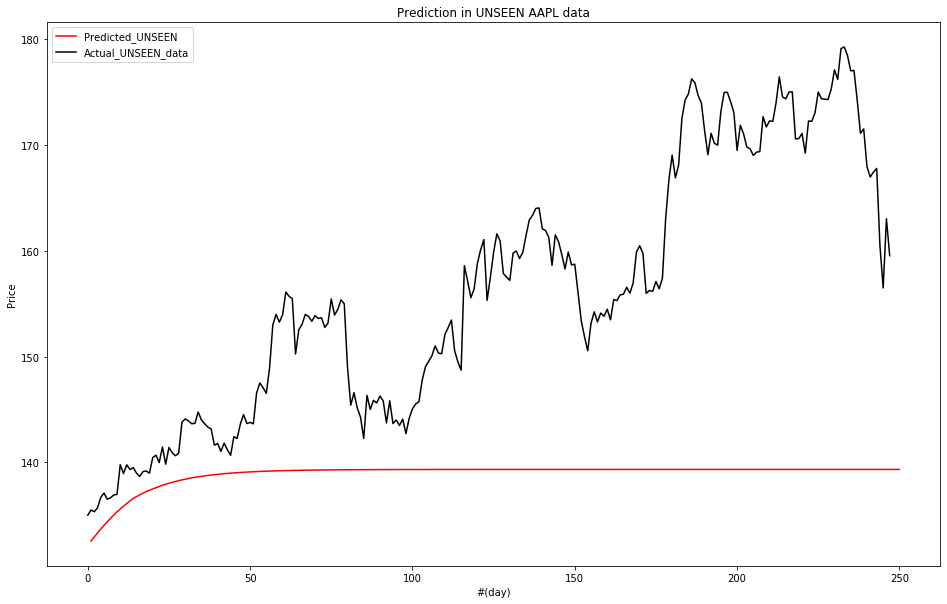

In [15]:
pred_unseen_to_plot = len(y_train)
plt.figure(figsize = (16,10))
plt.plot(scaler.inverse_transform(preds),color = 'r',label = 'Predicted_UNSEEN')
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),color = 'k',label = 'Actual_UNSEEN_data')
plt.xlabel('#(day)')
plt.ylabel('Price')
plt.title('Prediction in UNSEEN AAPL data')
plt.legend()
plt.show()